In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_openml

from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
import scipy.stats as stats

https://www.openml.org/d/42395

In [61]:
#X, y = fetch_openml('SantanderCustomerSatisfaction', version=1, return_X_y=True, as_frame=True)
#data = pd.read_csv('SCS.csv')

In [49]:
#len(data)

200000

In [54]:
#data.loc[0:100000, :].to_csv('SCS_1.csv', index = False)
#data.loc[100001:, :].to_csv('SCS_2.csv', index = False)

In [2]:
data_1 = pd.read_csv('SCS_1.csv')
data_2 = pd.read_csv('SCS_2.csv')

In [3]:
data = pd.concat([data_1, data_2])

In [4]:
data.head()

,Unnamed: 0,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,False
1,1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,False
2,2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,False
3,3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,False
4,4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,False


In [5]:
X = data.drop(['target', 'Unnamed: 0'], axis=1)
y = data['target']

In [6]:
X.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
X = X.drop('ID_code', axis=1)

In [8]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: target, dtype: bool

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.6,
                                                random_state=42)


Above I split the data into train and test already - I made the train data small (40%) for slower computers (including mine).

1. What percentage of records are True and False in our target variable y?

2. Plot the variance explained graph for PCA of your choice of number of components.

3. Try a couple of different models and model pipelines (I recommend trying PCA and/or StandardScaler); use the code below to evaluate models for ROC AUC. 

4. Pick the model or model pipeline that you like best and optimize the hyperparameters. Show its ROC AUC score on the test data using:

roc_auc_score(ytest, model.predict_proba(Xtest)[:, 1])

See the end of this notebook for the score from my pipeline - *if you get a higher ROC AUC I'll find a way to give some extra credit!*

In [4]:
# Code below will, given a model or pipeline, print the average of a cross-validated ROC AUC score, 
# which is one great way to evaluate model performance on a dataset like this.
# scores = cross_val_score(model, Xtrain, ytrain, scoring='roc_auc', cv=5)
# print(scores.mean())



In [5]:
# This code will give the ROC AUC score on the test data for a model or pipeline.
# roc_auc_score(ytest, model.predict_proba(Xtest)[:, 1])

Solution:

1. What percentage of records are True and False in our target variable y?

In [10]:
y.value_counts(normalize=True).mul(100).astype(str)+'%'

False    89.95100000000001%
True                10.049%
Name: target, dtype: object

2. Plot the variance explained graph for PCA of your choice of number of components.

original shape:    (200000, 200)
transformed shape: (200000, 20) 


PCA explained variance ratio: 
 [0.07134872 0.03101982 0.02756728 0.02690775 0.02489187 0.02287437
 0.02223887 0.02103454 0.02085259 0.02015387 0.01840197 0.01733036
 0.01688602 0.01675541 0.01664882 0.0133982  0.01291041 0.01232681
 0.01207042 0.01177375]


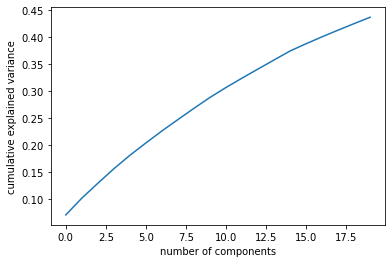

In [11]:
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape , '\n\n')

print('PCA explained variance ratio: \n', pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

3. Try a couple of different models and model pipelines (I recommend trying PCA and/or StandardScaler); 
use the code below to evaluate models for ROC AUC. 

In [12]:
# Logistic Regression
lr_pipe = make_pipeline(PCA(), StandardScaler(), LogisticRegression())
cross_val_score(lr_pipe, Xtrain, ytrain, scoring='roc_auc', cv=5).mean()

0.8593176607368042

In [13]:
# Gausian Naive Bayes
gnb_pipe = make_pipeline(PCA(), StandardScaler(), GaussianNB())
cross_val_score(gnb_pipe, Xtrain, ytrain, scoring='roc_auc', cv=5).mean()

0.8857333279784324

4. Pick the model or model pipeline that you like best and optimize the hyperparameters. Show its ROC AUC score on the test data using: roc_auc_score(ytest, model.predict_proba(Xtest)[:, 1])

In [14]:
parameters = {
    'pca__n_components': (0,20,40,100,199,200),

}

grid_search = GridSearchCV(gnb_pipe, parameters, n_jobs=-1, verbose=1)

In [15]:
grid_search.fit(Xtrain, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:   22.5s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.2s finished


GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('standardscaler', StandardScaler()),
                                       ('gaussiannb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'pca__n_components': (0, 20, 40, 100, 199, 200)},
             verbose=1)

In [16]:
grid_search.best_score_

0.9205250000000001

In [17]:
best_parameters = grid_search.best_estimator_.get_params()
print(best_parameters)

{'memory': None, 'steps': [('pca', PCA(n_components=199)), ('standardscaler', StandardScaler()), ('gaussiannb', GaussianNB())], 'verbose': False, 'pca': PCA(n_components=199), 'standardscaler': StandardScaler(), 'gaussiannb': GaussianNB(), 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 199, 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'gaussiannb__priors': None, 'gaussiannb__var_smoothing': 1e-09}


In [18]:
optimized_gnb = grid_search.best_estimator_

In [19]:
roc_auc_score(ytest, optimized_gnb.predict_proba(Xtest)[:, 1])

0.8837181204697626

Yay!!!

# Here is my best estimator performance - if yours is higher, I'll find a way to give extra credit!

In [46]:
optimized_model = random_search.best_estimator_

In [47]:
roc_auc_score(ytest, optimized_model.predict_proba(Xtest)[:, 1])

0.8571000407597704